In [2]:
import pandas as pd
import requests

In [3]:
url1 = f'https://data.ripple.com/v2/network/topology/?verbose=true'
res = requests.get(url1)
xrp_accts = pd.DataFrame(res.json()['nodes'])
#xrp_accts

#xrp_accts.to_csv("test.csv",index=False,sep=',')

In [15]:
df = pd.read_csv('test.csv')
df.tail()

,node_public_key,ip,version,uptime,inbound_count,outbound_count,rowkey,country,country_code,lat,long,timezone,port,city,postal_code,region,region_code,isp
1011,n9KSw8RE8L42XHCyoUrSSuWRgT2rY2cn4kSiZmwE2vkvvt...,139.196.235.22,rippled-0.31.2,304459,2,2,n9KSw8RE8L42XHCyoUrSSuWRgT2rY2cn4kSiZmwE2vkvvt...,China,CN,30.294,120.1619,Asia/Shanghai,56235.0,Hangzhou,NaN,Zhejiang,ZJ,NaN
1012,n9MuUBrwCjeEyAqGb28rRMZx8RjVjsFn6xKaaGBbdEGAe1...,139.196.235.33,rippled-0.31.2,304435,3,1,n9MuUBrwCjeEyAqGb28rRMZx8RjVjsFn6xKaaGBbdEGAe1...,China,CN,30.294,120.1619,Asia/Shanghai,56235.0,Hangzhou,NaN,Zhejiang,ZJ,NaN
1013,n9MJNHoxFKExArPE5apWq2k2dLn5sZEqWCN5Z9jUkvWVzY...,10.25.47.193,rippled-0.31.2,304414,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1014,n9KUcZCHp6pXCvzA9oouXonYPjTuzHoEMugUfNRN2QqgLb...,NaN,rippled-1.3.1,660797,0,1,n9KUcZCHp6pXCvzA9oouXonYPjTuzHoEMugUfNRN2QqgLb...,India,IN,20.000,77.0000,Asia/Kolkata,NaN,NaN,NaN,NaN,NaN,Mahanagar Telephone Nigam Ltd.
1015,n9Ms3adk2vDZ7p2fsYoJqFqv9ViqtZRF5pcukThVcymBcV...,NaN,rippled-1.3.1,660799,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df.shape

(1016, 18)

In [5]:
df = df[['uptime','city','country','node_public_key','region']]
df.tail()

,uptime,city,country,node_public_key,region
1011,304459,Hangzhou,China,n9KSw8RE8L42XHCyoUrSSuWRgT2rY2cn4kSiZmwE2vkvvt...,Zhejiang
1012,304435,Hangzhou,China,n9MuUBrwCjeEyAqGb28rRMZx8RjVjsFn6xKaaGBbdEGAe1...,Zhejiang
1013,304414,NaN,NaN,n9MJNHoxFKExArPE5apWq2k2dLn5sZEqWCN5Z9jUkvWVzY...,NaN
1014,660797,NaN,India,n9KUcZCHp6pXCvzA9oouXonYPjTuzHoEMugUfNRN2QqgLb...,NaN
1015,660799,NaN,NaN,n9Ms3adk2vDZ7p2fsYoJqFqv9ViqtZRF5pcukThVcymBcV...,NaN


In [6]:
df = df.groupby('country').uptime.mean().to_frame().reset_index()

In [7]:
df.sort_values(by = 'uptime' , axis=0, ascending=False, inplace=True)

In [14]:
df

,country,uptime
22,Norway,2.116826e+06
35,United States,1.611216e+06
14,Japan,1.504008e+06
28,Slovakia,1.155798e+06
33,Ukraine,1.145861e+06
7,Germany,1.103925e+06
17,Latvia,9.657310e+05
20,Netherlands,9.007923e+05
27,Singapore,8.892396e+05
0,Australia,8.820545e+05


In [9]:
df.shape

(38, 2)

In [10]:
#df.isnull().sum()  # missing values
#df.dropna(how='any', inplace=True)

In [11]:
#df.shape

In [12]:
pd.unique(df['country'])

array(['Norway', 'United States', 'Japan', 'Slovakia', 'Ukraine',
       'Germany', 'Latvia', 'Netherlands', 'Singapore', 'Australia',
       'Finland', 'New Zealand', 'South Korea', 'Slovenia', 'Hong Kong',
       'Luxembourg', 'India', 'Ireland', 'Denmark', 'United Kingdom',
       'Korea, Republic of', 'France', 'Switzerland', 'China', 'Iceland',
       'Canada', 'Brazil', 'Serbia', 'Russia', 'Vietnam', 'Malaysia',
       'Italy', 'South Africa', 'Romania', 'Israel', 'Uzbekistan',
       'Kenya', 'Republic of Lithuania'], dtype=object)

In [13]:
import seaborn as sns
%matplotlib inline

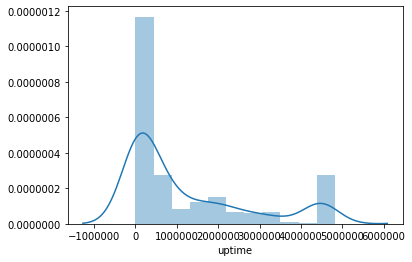

In [32]:
sns.distplot(df['uptime'])
# Safe to ignore warnings

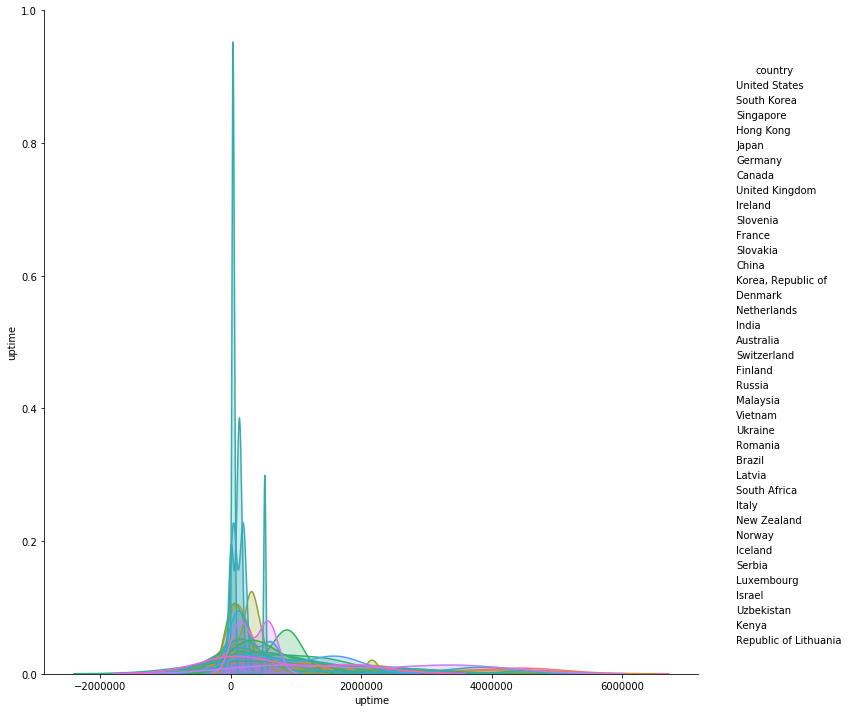

In [50]:
sns.pairplot(df,hue='country', size=10)

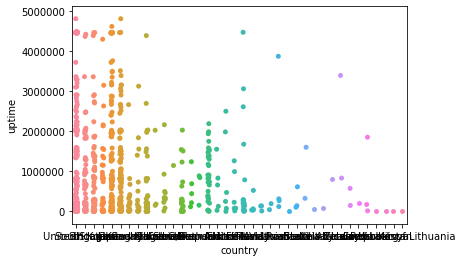

In [57]:
sns.stripplot(x="country", y="uptime", data=df, jitter=True)

In [17]:
import requests

In [87]:
url2 = f'https://data.ripple.com/v2/network/exchange_volume?'
res = requests.get(url2)
xrp_exchange_volume = pd.DataFrame(res.json()['rows'])['components']
type(xrp_exchange_volume)


pandas.core.series.Series

In [120]:
import json
import ast
content = json.loads(res.content.decode('utf-8'))
dic = content['rows'][0]
#pd.DataFrame(content['rows'][0])
dic = dic['components']
#dic = dic[0]
#type(dic)
df = pd.DataFrame(dic).reset_index(drop = True)

L = [elem for elem in df['base']]
df2 = pd.DataFrame(L)
df2 = df2.rename(columns={"currency":"base_currency",'issuer':'base_issuer'})
df = df.join(df2)


L = [elem for elem in df['counter']]
df2 = pd.DataFrame(L)
df2 = df2.rename(columns={"currency":"counter_currency",'issuer':'counter_issuer'})
df = df.join(df2)
df
cols = ['amount', 'base_currency','base_issuer','converted_amount','count','counter_currency','counter_issuer','rate']
df = df[cols]
df.head()

,amount,base_currency,base_issuer,converted_amount,count,counter_currency,counter_issuer,rate
0,298393.9342127465,USD,rvYAfWj5gh67oV6fW32ZzP3Aw4Eubs59B,1090210.9214317326,88,XRP,NaN,0.27370300
1,8.773097755782864,BTC,rchGBxcD1A1C2tdxF6papQYZ8kjRKMYcL,284529.07829827163,112,XRP,NaN,0.000030833700
2,544734.5814988305,CNY,rKiCet8SdvWxPXnAgYarFUXMh1zCPz432Y,274936.1447431875,534,XRP,NaN,1.9813100
3,55409.02426760935,EUR,rhub8VRN55s94qWKDv6jmDy1pUykJzF3wq,215139.71364900924,810,XRP,NaN,0.25754900
4,247898.6382576436,CNY,razqQKzJRdB4UxFPWf5NEpEG3WMkmwgcXA,124001.91652639919,93,XRP,NaN,1.9991500
